In [1]:
import numpy as np

### Steps of the algorithm:

* Calculate the predictions: $\hat y_i = \frac{1}{1+e^{-\sum_i w_i x_i + b_i}}$,
* Calculate loss: $L = - \big ( \sum_i y_i \log \hat y_i + (1 - y_i) \log(1 - \hat y_i) \big )$, where $y_i$ are true labels
* Calculate gradient elements: $\Delta w_i = \frac{1}{n} \sum_{i =1}^n \big ( \hat y_i - y_i \big ) \cdot x_i$ $\quad$ and $\quad$ $\Delta b = \frac{1}{n}\sum_{i = 1}^n \big ( \hat y_i - y_i \big )$
* Update weights and biases according to $w_i = w_i - \alpha \Delta w_i$ $\quad$ and $\quad$ $b = b - \alpha \Delta b$
* If necessary, add regularizing term $\frac{\lambda}{2 n} \sum_i w_i ^2$ to the loss

In [2]:
# Define sigmoid function

def sigmoid(z):
    """
    Computes the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z

    """

    return 1/(1+np.exp(-z))

In [3]:
# Define cost function of logistic regression (cross-entropy)

def compute_cost(X, y, w, b):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model

      total_cost : (scalar) cost
    """

    m, n = X.shape

    total_cost = - np.dot(y, np.log(sigmoid(np.dot(X, w) + b))) - np.dot(1 - y, np.log(1 - sigmoid(np.dot(X, w) + b)))
    total_cost /= m

    return total_cost

In [4]:
# Define function for gradient computation (without regularization)

def compute_gradient(X, y, w, b):
    """
    Computes the gradient for logistic regression

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model

      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w.
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b.
    """
    m, n = X.shape

    dj_db = (1/m) * np.sum(sigmoid(np.dot(X, w) + b) - y)
    dj_dw = (1/m) * np.dot(sigmoid(np.dot(X, w) + b) - y, X)

    return dj_db, dj_dw

In [5]:
# Implement gradient descent (without regularization) for logistic regression

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X :    (ndarray Shape (m, n) data, m examples by n features
      y :    (ndarray Shape (m,))  target value
      w_in : (ndarray Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)              Initial value of parameter of the model
      cost_function :              function to compute cost
      gradient_function :          function to compute gradient
      alpha : (float)              Learning rate
      num_iters : (int)            number of iterations to run gradient descent
      lambda_ : (scalar, float)    regularization constant

    Returns:
      w : (ndarray Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    import math
    # number of training examples
    m = len(X)

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w_in, b_in, J_history, w_history #return w and J,w history for graphing

In [6]:
# Create function for gradient computation (with regularization)

def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar, float) Controls amount of regularization
    Returns:
      total_cost : (scalar)     cost
    """

    m, n = X.shape

    # Calls the compute_cost function
    cost_without_reg = compute_cost(X, y, w, b)

    reg_cost = lambda_/(2*m) * np.sum(np.dot(w, w))

    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + reg_cost

    return total_cost

In [7]:
# Implement gradient descent (with regularization) for logistic regression

def compute_gradient_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the gradient for logistic regression with regularization

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (ndarray Shape (m,))  target value
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model
      lambda_ : (scalar,float)  regularization constant
    Returns
      dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b.
      dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w.

    """
    m, n = X.shape

    dj_db, dj_dw = compute_gradient(X, y, w, b)

    dj_dw += lambda_/m * w

    return dj_db, dj_dw

In [8]:
# Create predict function for evaluation of logisic regression algorithm

def predict(X, w, b):
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w

    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      w : (ndarray Shape (n,))  values of parameters of the model
      b : (scalar)              value of bias parameter of the model

    Returns:
      p : (ndarray (m,)) The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape

    logits = sigmoid(np.dot(X, w) + b)
    p = np.where(logits >= 0.5, 1, 0)

    return p

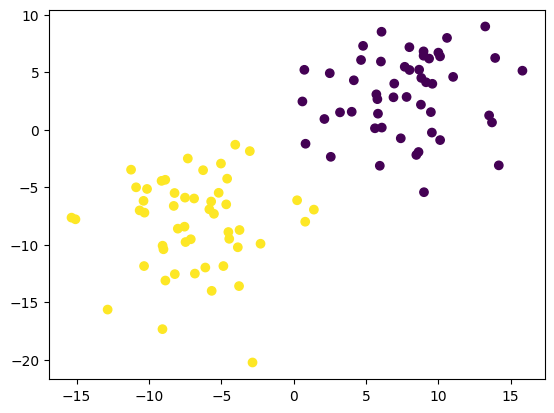

In [9]:
# Create test set using make_blobs function fo scikit learn

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples = 100, n_features = 2, centers = 2, cluster_std = 3.5)

# Plot the dataset

plt.scatter(X[:,0], X[:,1], c = y)

plt.show()

In [10]:
# Make predictions

w_in = np.zeros(shape = (X.shape[1],))
b_in = 0.0

w, b, _, _ = gradient_descent(X = X, y = y, w_in = w_in, b_in = b_in, cost_function = compute_cost_reg,
                 gradient_function = compute_gradient_reg, alpha = 0.01, num_iters = 100, lambda_ = 0.001)

Iteration    0: Cost     0.51   
Iteration   10: Cost     0.16   
Iteration   20: Cost     0.11   
Iteration   30: Cost     0.09   
Iteration   40: Cost     0.07   
Iteration   50: Cost     0.06   
Iteration   60: Cost     0.06   
Iteration   70: Cost     0.05   
Iteration   80: Cost     0.05   
Iteration   90: Cost     0.05   
Iteration   99: Cost     0.05   


In [11]:
w

array([-0.41892845, -0.27926657])

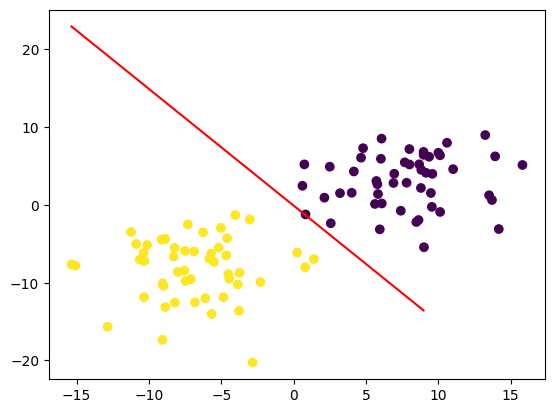

In [12]:
# Plot the decision boundary
x_min = X[:,0].min()
x_max = X[:,1].max()

x_new = np.linspace(x_min, x_max, 100)

y_new = -b/w[1] - x_new * (w[0]/ w[1])

plt.plot(x_new, y_new, color = 'red')
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()
